# Homework sheet 1 solution 
## Homework group ID: ~

# Bessel functions
In this exercise we will verify two relations of the Bessel function $J_n(x)$. The relations are asymptotic form of $J_n(x)$ for $x \gg n$ and the recursion relation to obtain $J_{n+1}(x)$. The relations are: 

- $J_n(x) \approx \sqrt{\frac{2}{\pi x}}\cos(x-(n\frac{\pi}{2}+\frac{\pi}{4}))$ for $x\gg n$
- $J_{n+1}(x) = \frac{2n}{x} J_n(x)-J_{n-1}(x)$

We will check the above relations both explicity, but defining a function for the formula and by using the `scipy` Bessel function.

# The asymptotic function

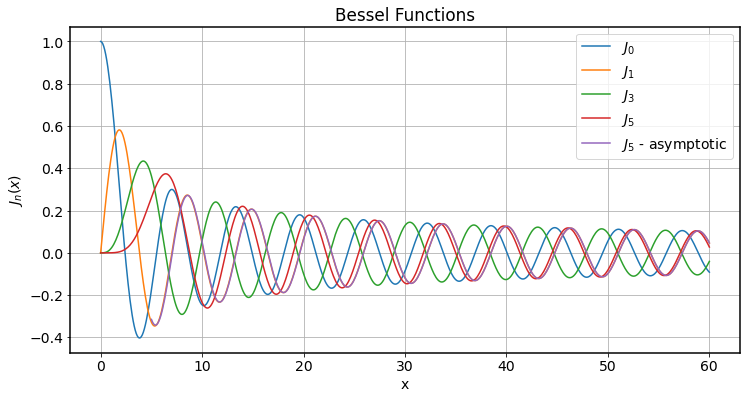

In [33]:
# make sure the plots are in the notebook 
%matplotlib inline

# importing relevant packages 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.special as ss

# defining the function for x >> n 
def bessel(n, x):
    return np.sqrt(2 / (np.pi * x)) * np.cos(x - (n * np.pi / 2 + np.pi / 4))

# using np.linspace to get evenly spaced x from (0, 60]
x = np.linspace(0., 60, 600)

# setting figure size and other paramters to make a nicer plot 
plt.figure(figsize = (12, 6))
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['axes.linewidth'] = 1.5

# plotting J_n with scipy
for n in [0, 1, 3, 5]:
    plt.plot(x, ss.jn(n, x), label = "$J_%d$" % n)

# checking if it is at least x > n and plotting it
x_asym = x[x > n]
plt.plot(x_asym, bessel(n, x_asym), label = "$J_%d$ - asymptotic" % n)
plt.title('Bessel Functions')
plt.xlabel('x')
plt.ylabel('$J_n(x)$')
plt.legend()
plt.grid()
plt.show()

It is clear that for large value of $x$, the asymptotic value is pretty similar to the Bessel function. 

# The recursion relation
We now compare the `scipy` implementation of the Bessel function and the recursion relation 

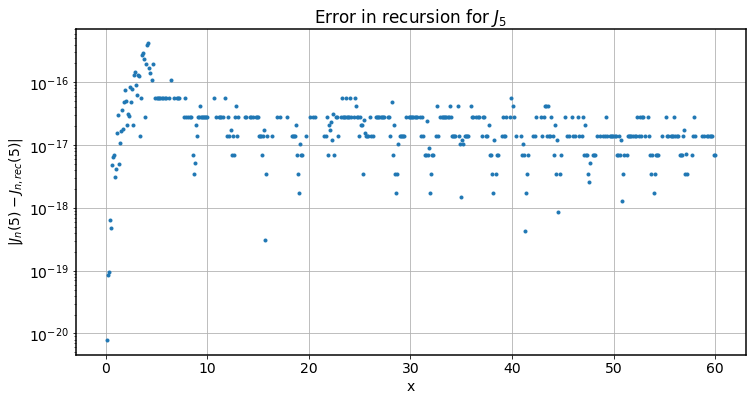

The mean error is 1.8564279771514404e-17


In [51]:
# importing relevant packages 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.special as ss

# using np.linspace to get evenly spaced x from (0, 60]
x = np.linspace(0.1, 60, 600)

# setting n = 5 so that we can draw comparison for that value
n = 5

# the recursion relation is given by
j_n_rec = 2 * (n - 1) / x * ss.jn(n - 1, x) - ss.jn(n - 2, x)

# scipy implementation 
j_n = ss.jn(5, x)

# setting figure size and other paramters to make a nicer plot 
plt.figure(figsize = (12, 6))
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['axes.linewidth'] = 1.5

# we plot the difference between the two values. lograthmic y scale is used so as to clearly see the errors
plt.semilogy(x, abs(j_n - j_n_rec), '.')
plt.title('Error in recursion for $J_%d$' % n)
plt.xlabel('x')
plt.ylabel('$|J_n(5) - J_{n,rec}(5)|$')
plt.grid()
plt.show()

# calculating and printing the mean error
print('The mean error is', np.mean(abs(j_n - j_n_rec)))

The `scipy` Bessel function implementation satisfies the recursion relation up to ($|J_5(x) - J_{5, rec}|\approx 10^{-17}$)